In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\airline_sentiment_analysis.csv')

In [3]:
print(data)

       Unnamed: 0 airline_sentiment  \
0               1          positive   
1               3          negative   
2               4          negative   
3               5          negative   
4               6          positive   
...           ...               ...   
11536       14633          negative   
11537       14634          negative   
11538       14635          positive   
11539       14636          negative   
11540       14638          negative   

                                                    text  
0      @VirginAmerica plus you've added commercials t...  
1      @VirginAmerica it's really aggressive to blast...  
2      @VirginAmerica and it's a really big bad thing...  
3      @VirginAmerica seriously would pay $30 a fligh...  
4      @VirginAmerica yes, nearly every time I fly VX...  
...                                                  ...  
11536  @AmericanAir my flight was Cancelled Flightled...  
11537         @AmericanAir right on cue with the delays👌  


In [4]:
airline_tweets = pd.read_csv((r'C:\Users\user\Downloads\airline_sentiment_analysis.csv'))

In [5]:
airline_tweets.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [7]:
data.describe()

,Unnamed: 0
count,11541.000000
mean,7456.888311
std,4298.601764
min,1.000000
25%,3614.000000
50%,7601.000000
75%,11221.000000
max,14638.000000


In [24]:
X=data.iloc[:,:=1].values
y=data.iloc[:,-1].values


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [16]:
y_test

array(['@united who is in charge of making decisions over there? Cancelled Flightling flight UA1150 was unacceptable. I should be in #Belize right now.',
       "@united great decision making skills flight ops IAH bag makes a 10 minute connection and I don't, flight pushed early. Disappointed!!!!",
       "@AmericanAir so what if I didn't have the funds to purchase another ticket? Your error would cause my family to miss the funeral",
       ...,
       "@united after 2 days - 1 flight Cancelled Flightled, another delay for 8 hours- united gave me a $7 food voucher. That's how much they value my time??",
       '@united provide a voucher for one of my customers and I will tweet about you all day long #earnedmybusiness',
       '@USAirways yeah , I have been expecting The same for 3 hours'],
      dtype=object)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=50)

In [18]:
y_train

array(["@SouthwestAir couldn't be bothered to help with my lost my luggage. Not a single helpful employee owner to be found in BWI.",
       "@USAirways if one with @AmericanAir why can't you use American miles????",
       '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
       ...,
       "@JetBlue Capital One and I explained the false fraud alert. Why did the Jet Blue representative issue me a new tkt if it wasn't resolved?",
       "@AmericanAir 2nd time in 4 days that my flight has been delayed and my gate agent hasn't said anything! Thanks for the memories. #NeverAgain",
       '@JetBlue, thanks for not guarantee that you can not deli ever my bags to my hotel, when bag missed connection. #sFO #customerservicenot'],
      dtype=object)

In [85]:
# random split train and test data
index = data.index
data['random_number'] = np.random.randn(len(index))
train = data[data['random_number'] <= 0.8]
test = data[data['random_number'] > 0.8]

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [89]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [90]:
lr.fit(X_train,y_train)

LogisticRegression()

In [92]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[2467]], dtype=int64)

In [75]:

import requests
import json
from pandas.io.json import json_normalize
import config


class RidbData():
   def __init__(self, name, endpoint, url_params):
      self.df = pd.DataFrame()
      self.endpoint = endpoint
      self.url_params = url_params
      self.name = name

   def clean(self) :
      # by replacing '' with np.NaN we can use dropna to remove rows missing 
      # required data, like lat/longs
      self.df = self.df.replace('', np.nan)

      # normalize column names for lat and long. i.e. can be 
      # FacilityLatitude or RecAreaLatitude
      self.df.columns = self.df.columns.str.replace('.*Latitude', 'Latitude')
      self.df.columns = self.df.columns.str.replace('.*Longitude', 'Longitude')
      self.df = self.df.dropna(subset=['Latitude','Longitude'])

   def extract(self):
      request_url = self.endpoint
      response = requests.get(url=self.endpoint,params=self.url_params)
      data = json.loads(response.text)
      self.df = json_normalize(data['RECDATA'])

In [76]:
def get_ridb_data(endpoint,url_params):
   response = requests.get(url = endpoint, params = url_params)
   data = json.loads(response.text)
   df = json_normalize(data['RECDATA'])
   df = df.replace('', np.nan)
   df.columns = df.columns.str.replace('.*Latitude', 'Latitude')
   df.columns = df.columns.str.replace('.*Longitude', 'Longitude')
   df = df.dropna(subset=['Latitude','Longitude'])
   return df


In [77]:
def get_ridb_data(endpoint,url_params):
   response = requests.get(url = endpoint, params = url_params)
   data = json.loads(response.text)
   df = json_normalize(data['RECDATA'])
   df = df.replace('', np.nan)
   df.columns = df.columns.str.replace('.*Latitude', 'Latitude')
   df.columns = df.columns.str.replace('.*Longitude', 'Longitude')
   df = df.dropna(subset=['Latitude','Longitude'])
   return df

def get_ridb_facility_media(endpoint, url_params):
   # endpoint = https://ridb.recreation.gov/api/v1/facilities/facilityID/media/  
   response = requests.get(url = endpoint, params = url_params) 
   data = json.loads(response.text)
   df = json_normalize(data['RECDATA'])
   df = df[df['MediaType'] == 'Image']
   return df

In [67]:
data = data[data['Unnamed: 0'] != 3]
data['sentiment'] = data['Unnamed: 0'].apply(lambda rating : +1 if rating > 3 else -1)

In [69]:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]

In [27]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:xlabel='Unnamed: 0'>

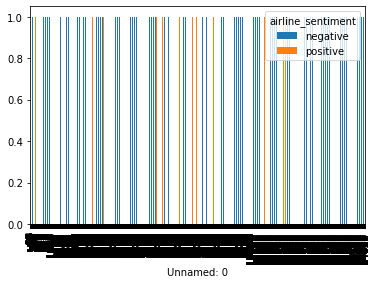

In [96]:
airline_sentiment = airline_tweets.groupby(['Unnamed: 0', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='Unnamed: 0'>

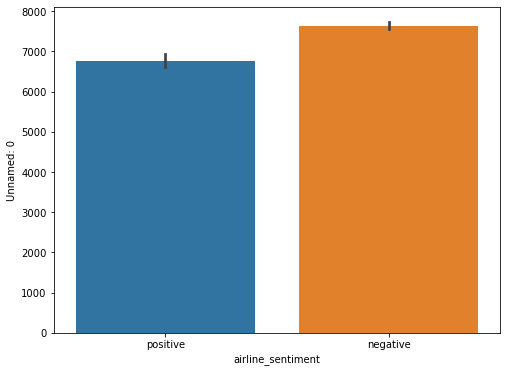

In [28]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='Unnamed: 0' , data=airline_tweets)


In [29]:
features = airline_tweets.iloc[:, 1].values
labels = airline_tweets.iloc[:, 1].values

In [30]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [31]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [34]:
predictions = text_classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1839    0]
 [   0  470]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1839
    positive       1.00      1.00      1.00       470

    accuracy                           1.00      2309
   macro avg       1.00      1.00      1.00      2309
weighted avg       1.00      1.00      1.00      2309

1.0


In [ ]:
from wsgiref.simple_server import make_server
from pyramid.config import Configurator
from pyramid.response import Response


def hello_world(request):
    return Response('Hello World!')


if __name__ == '__main__':
    with Configurator() as config:
        config.add_route('hello', '/')
        config.add_view(hello_world, route_name='hello')
        app = config.make_wsgi_app()
    server = make_server('0.0.0.0', 6543, app)
    server.serve_forever()

127.0.0.1 - - [27/Nov/2020 20:16:20] "GET / HTTP/1.1" 200 12
127.0.0.1 - - [27/Nov/2020 20:16:20] "GET /favicon.ico HTTP/1.1" 404 164


In [ ]:
import pytest

In [19]:
from __future__ import unicode_literals

from collections import namedtuple
from copy import deepcopy

import jsonschema
import simplejson
from jsonschema import RefResolver
from jsonschema import validators
from jsonschema.exceptions import ValidationError
from jsonschema.validators import Draft3Validator
from jsonschema.validators import Draft4Validator
from six import iteritems

In [20]:
 def __call__(self, value, system):
        response = system['request'].response
        response.headers['Content-Type'] = 'application/x-yaml; charset=UTF-8'
        return yaml.dump(value).encode('utf-8')
        return yaml.safe_dump(value).encode('utf-8')


#def build_swagger_20_swagger_schema_views(config)


In [21]:
def validate_yaml_response(response, expected_dict):
    assert response.headers['content-type'] == 'application/x-yaml; charset=UTF-8'
    assert _strip_xmodel(yaml.load(response.body)) == expected_dict
    assert _strip_xmodel(yaml.safe_load(response.body)) == expected_dict


def _rewrite_ref(ref, schema_format):
    if schema_format == 'yaml':
        return ref  # all refs are already yaml
    return ref.replace('.yaml', '.%s' % schema_format)
def _recursively_rewrite_refs(schema_item, schema_format):
    if isinstance(schema_item, dict):
        for key, value in schema_item.items():
             if key == '$ref':
                schema_item[key] = _rewrite_ref(value, schema_format)
           # else:
                _recursively_rewrite_refs(value, schema_format)
    elif isinstance(schema_item, list):
        for item in schema_item:
            _recursively_rewrite_refs(item, schema_format)
@pytest.mark.parametrize('schema_format', ['json', 'yaml'])
@pytest.mark.parametrize('test_file', ['swagger', 'defs'])
def test_swagger_json_api_doc_route(testapp_with_base64, test_file, schema_format):
    validation_method = {
        'yaml': validate_yaml_response,
        'json': validate_json_response,
    }
    url = '/%s.%s' % (test_file, schema_format)
    response = testapp_with_base64.get(url)
    assert response.status_code == 200
    fname = 'tests/sample_schemas/yaml_app/%s.yaml' % test_file
    with open(fname, 'r') as f:
        expected_schema = yaml.load(f)
        expected_schema = yaml.safe_load(f)

    _recursively_rewrite_refs(expected_schema, schema_format)

    validation_method[schema_format](response, expected_schema)
    